In [4]:
import numpy as np

# 假设 w, x, b 已经定义
w=-1.28
x=1
b=-0.98
z = np.dot(w, x) + b
sigmoid = 1 / (1 + np.exp(-z))
sigmoid

0.09449036895015932

# Matrix times Vector (easy)

In [4]:
#Matrix times Vector (easy)
from typing import List
def matrix_dot_vector(a,b):
    if len(a[0]) != len(b):
        return -1

    result = []
    for i in range(len(a)):
        sum = 0
        for j in range(len(a[0])):
            sum += a[i][j] * b[j]
        result.append(sum)
    return result


a=[[1,2],[2,4]]
b=[1,2]
result=matrix_dot_vector(a,b)



# 计算协方差矩阵

协方差矩阵是统计学中的一个基本概念，说明两个随机变量一起变化的程度。

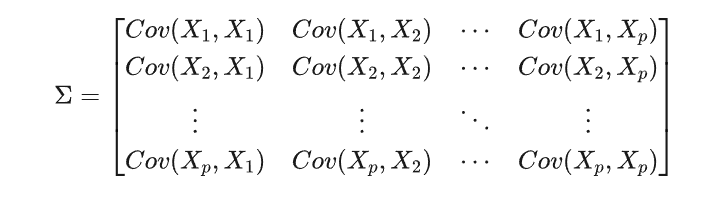

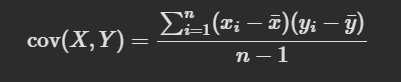

In [11]:
#生成一个二维数组
from typing import List
def sum_average(list):
    sum=0
    for i in list:
        sum+=i
    return sum/len(list)
def calculate_covariance_matrix(vectors):
    result=[[]for _ in range(len(vectors))]
    clo=len(vectors[0])
    row=len(vectors)#这里是vector的行数
    for i in range(row):
        sum=0
        for j in range(row):
            for k in range(clo):
                sum+=((vectors[i][k]-sum_average(vectors[i]))*(vectors[j][k]-sum_average(vectors[i])))/(clo-1)
            result[i].append(sum)
            sum=0
    return result
vector = [[1, 2, 3], [4,5,6]]
result = calculate_covariance_matrix(vector)  
print(result)

[[1.0, 1.0], [1.0, 1.0]]


# 使用雅可比法求解线性方程（中等）

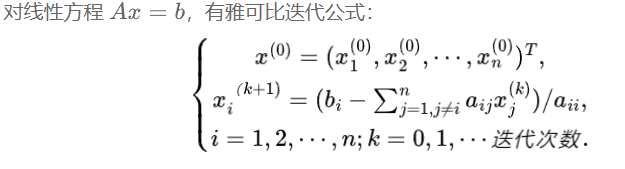

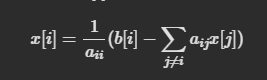

In [4]:
#gpt的答案
import numpy as np

def jacobi_method(A, b, iterations=10):
    # Initial guess for x (can be zeros or any other initial guess)
    x = np.zeros_like(b, dtype=np.float64)
    
    # Iterate for the specified number of times
    for _ in range(iterations):
        # Create a copy of the current x to store new values
        x_new = np.zeros_like(x, dtype=np.float64)
        
        for i in range(A.shape[0]):
            # Sum the product of A's row and x, excluding the diagonal element
            sum_Ax = sum(A[i][j] * x[j] for j in range(A.shape[1]) if i != j)
            
            # Calculate the new value for x[i]
            x_new[i] = (b[i] - sum_Ax) / A[i][i]
        
        # Round the new x to 4 decimal places
        x = np.round(x_new, 4)
    
    return x

# Example usage
A = np.array([[5, -2, 3], [-3, 9, 1], [2, -1, -7]], dtype=np.float64)
b = np.array([-1, 2, 3], dtype=np.float64)

approx_solution = jacobi_method(A, b)
print("Approximate solution:", approx_solution)


Approximate solution: [ 0.1861  0.3313 -0.4227]


In [1]:
import numpy as np

def solve_jacobi(A: np.ndarray, b: np.ndarray, n: int) -> list:
    d_a = np.diag(A)
    nda = A - np.diag(d_a)
    x = np.zeros(len(b))
    x_hold = np.zeros(len(b))
    for _ in range(n):
        for i in range(len(A)):
            x_hold[i] = (1/d_a[i]) * (b[i] - sum(nda[i]*x))
        x = x_hold.copy()
    return np.round(x,4).tolist()

# Example usage
A = np.array([[5, -2, 3], [-3, 9, 1], [2, -1, -7]], dtype=np.float64)
b = np.array([-1, 2, 3], dtype=np.float64)
n = 1000#迭代次数
result = solve_jacobi(A, b, n)
result


[0.1861, 0.3312, -0.4227]

In [2]:
A = np.array([1, 2, 3])
d_a = sum(A)
d_a

6

# 奇异值分解（SVD）（难/未解决）

In [13]:
import numpy as np

def svd_2x2_singular_values(A: np.ndarray) -> tuple:
    A_T_A = A.T @ A
    theta = 0.5 * np.arctan2(2 * A_T_A[0, 1], A_T_A[0, 0] - A_T_A[1, 1])
    j = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    A_prime = j.T @ A_T_A @ j 
    
    # Calculate singular values from the diagonalized A^TA (approximation for 2x2 case)
    singular_values = np.sqrt(np.diag(A_prime))

    # Process for AA^T, if needed, similar to A^TA can be added here for completeness
    return j, singular_values, j.T

if __name__ == "__main__":
    # Example usage
    A = np.array([[2,1], [1,2]])
    U, singular_values, V_T = svd_2x2_singular_values(A)
    print("U:", U)
    print("Singular values:", singular_values)
    print("V^T:", V_T)

U: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Singular values: [3. 1.]
V^T: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [7]:
A = np.array([[2,1], [1,2]])
B=A.T
A*B

array([[4, 1],
       [1, 4]])

In [8]:
import numpy as np

def calculate_eigenvalues_and_eigenvectors(A):
    # 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    return eigenvalues, eigenvectors

def explain_eigenvalues_and_eigenvectors(A):
    eigenvalues, eigenvectors = calculate_eigenvalues_and_eigenvectors(A)
    
    print("矩阵 A:")
    print(A)
    print("\n特征值:")
    print(eigenvalues)
    print("\n特征向量:")
    print(eigenvectors)
    
    # 解释特征值和特征向量
    for i in range(len(eigenvalues)):
        print(f"\n特征值 {i + 1}: {eigenvalues[i]}")
        print(f"对应的特征向量: {eigenvectors[:, i]}")
        
        # 验证 Av = λv
        Av = A @ eigenvectors[:, i]
        lambda_v = eigenvalues[i] * eigenvectors[:, i]
        print("验证 Av = λv:")
        print(f"A @ v: {Av}")
        print(f"λ * v: {lambda_v}")
        print(f"是否相等: {np.allclose(Av, lambda_v)}")

if __name__ == "__main__":
    # 示例矩阵
    A = np.array([[4, 1],
                  [2, 3]], dtype=float)
    
    explain_eigenvalues_and_eigenvectors(A)


矩阵 A:
[[4. 1.]
 [2. 3.]]

特征值:
[5. 2.]

特征向量:
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]

特征值 1: 5.0
对应的特征向量: [0.70710678 0.70710678]
验证 Av = λv:
A @ v: [3.53553391 3.53553391]
λ * v: [3.53553391 3.53553391]
是否相等: True

特征值 2: 2.0
对应的特征向量: [-0.4472136   0.89442719]
验证 Av = λv:
A @ v: [-0.89442719  1.78885438]
λ * v: [-0.89442719  1.78885438]
是否相等: True


# 使用正态方程的线性回归（简单）

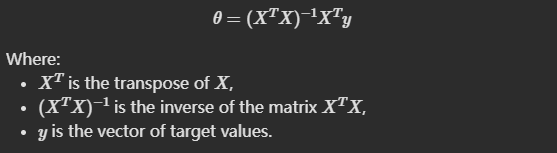

In [22]:
import numpy as np
from typing import List
def linear_regression_normal_equation(X: list[list[float]], y: list[float]) -> list[float]:
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    X_transpose = X.T
    theta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    theta = np.round(theta, 4).flatten().tolist()
    return theta

# Example usage 
X = [[1, 1], [1, 2], [1, 3]]
Y=[2,4,6]
result = linear_regression_normal_equation(X, Y)
result

[-0.0, 2.0]

In [20]:
X = [[1, 1], [1, 2], [1, 3]]
X = np.array(X)
X=X.T
X

array([[1, 1, 1],
       [1, 2, 3]])

# 使用梯度下降的线性回归

In [29]:
import numpy as np
def linear_regression_gradient_descent(X: np.ndarray, y: np.ndarray, alpha: float, iterations: int) -> np.ndarray:
    m, n = X.shape
    theta = np.zeros((n, 1))
    for _ in range(iterations):
        predictions = X @ theta
        errors = predictions - y.reshape(-1, 1)
        updates = X.T @ errors / m
        theta -= alpha * updates
    return np.round(theta.flatten(), 4)

if __name__ == "__main__":
    # Example usage
    X = np.array([[1, 1], [1, 2], [1, 3]])
    y = np.array([1, 2, 3])
    alpha = 0.1
    iterations = 1000
    result = linear_regression_gradient_descent(X, y, alpha, iterations)
    print("Result:", result)

Result: [0. 1.]
